##### Grading Feedback Cell

# Question 0 (-2 If not answered)
Please provide the following the data so we can verify your github information and ensure accurate grading:
- Your Name: Yunhan Zhang
- Your SU ID: 405379315

# IST 718: Big Data Analytics

- Professors: 
  - Willard Williamson <wewillia@syr.edu>
  - Emory Creel <emcreel@g.syr.edu>
- Faculty Assistants: 
  - Warren Justin Fernandes <wjfernan@syr.edu>
  - Ruchita Hiteshkumar Harsora <	rharsora@g.syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- Google Colab is the official class runtime environment so you should test your code on Colab before submission.
- Do not modify cells marked as grading cells or marked as do not modify.
- Before submitting your work, remember to check for run time errors with the following procedure:
`Runtime `$\rightarrow$ Factory reset runtime followed by Runtime $\rightarrow$ Run All.  All runtime errors will result in a minimum penalty of half off.
- All plots shall include descriptive title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Your notebook must run from start to finish without requiring manual input by the graders.  For example, do not mount your personal Google drive in your notebook as this will require graders to perform manual steps.  In short, your notebook should run from start to finish with no runtime errors and no need for graders to perform any manual steps.

In [154]:
from pyspark.ml import feature
from pyspark.ml import clustering
from pyspark.ml import Pipeline
from pyspark.sql import functions as fn
from pyspark.sql.functions import col, concat, lit
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.sql import functions as fn, Row
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import RegexTokenizer
from pyspark.ml.feature import IDF
from pyspark.sql import types

# seting master("local[*]") enables multicore processing on all available logical cores on your machine
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [155]:
%%bash
# Do not change or modify this cell
# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already installed
pip install pyspark >& /dev/null 

# Download the data files from github
# If the data file does not exist in the colab environment
data_file_1=colleges_data_science_programs.csv

if [[ ! -f ./${data_file_1} ]]; then 
   # download the data file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/${data_file_1} >& /dev/null 
fi

# Unsupervised learning

The colleges_data_science_programs dataset contains information about dozens of "data science" programs across the US.

## Question 1: (10 pts)

This dataset contains many columns that we can use to understand how these data science programs differ from one another.

## Question 1a (5 pts)
Read the colleges_data_science_programs.csv data file into a data frame named raw_ds_programs_text_df.

In [156]:
# read data file into a spark data frame
raw_ds_programs_text_df = spark.read.csv('colleges_data_science_programs.csv', header=True)

In [157]:
# Grading Cell Do not Modify
print("rows:", raw_ds_programs_text_df.count(), ", cols:", len(raw_ds_programs_text_df.columns))
display(raw_ds_programs_text_df.show(5))

rows: 222 , cols: 28
+---+--------------------+--------------------+--------------------+-------+-------+-----+------+--------+--------------------+--------------------+--------------------+----------------+------------+-------+----------+------------+-----+----+-------------+----------------+--------+---------+--------------------+--------+---------+---------+------+
| id|                name|                 url|             program| degree|country|state|online|oncampus|          department|          created_at|          updated_at|university_count|program_size|courses|admit_reqs|year_founded|notes|cost|visualization|machine learning|business|databases|programminglanguages|capstone|mapreduce|part-time|ethics|
+---+--------------------+--------------------+--------------------+-------+-------+-----+------+--------+--------------------+--------------------+--------------------+----------------+------------+-------+----------+------------+-----+----+-------------+----------------+------

None

##### Grading Feedback Cell

## Question 1b (5 pts)
- Starting with `raw_ds_programs_text_df`, create a new dataframe named `ds_programs_text_df` which simply adds a column named `text` to the dataframe `raw_ds_programs_df`. 
- The `text` column will have the concatenation of the following columns separated by a space: `program`, `degree` and `department` (find the appropriate function in the `fn` package). <br>

An example of the `ds_programs_text_df` should give you:

```python
ds_programs_text_df.orderBy('id').first().text
```

```console
'Data Science Masters Mathematics and Statistics'
```

In [158]:
# create text and concatenate three columns
ds_programs_text_df = raw_ds_programs_text_df.withColumn("text", fn.concat_ws(' ', col("program"), 
                                                                        col("degree"), col("department")))

In [159]:
# Grading Cell Do Not Modify
display(ds_programs_text_df.show(5))
display(ds_programs_text_df.select('text').show(5, truncate=False))

+---+--------------------+--------------------+--------------------+-------+-------+-----+------+--------+--------------------+--------------------+--------------------+----------------+------------+-------+----------+------------+-----+----+-------------+----------------+--------+---------+--------------------+--------+---------+---------+------+--------------------+
| id|                name|                 url|             program| degree|country|state|online|oncampus|          department|          created_at|          updated_at|university_count|program_size|courses|admit_reqs|year_founded|notes|cost|visualization|machine learning|business|databases|programminglanguages|capstone|mapreduce|part-time|ethics|                text|
+---+--------------------+--------------------+--------------------+-------+-------+-----+------+--------+--------------------+--------------------+--------------------+----------------+------------+-------+----------+------------+-----+----+-------------+--

None

+------------------------------------------------------------------+
|text                                                              |
+------------------------------------------------------------------+
|Data Science Masters Mathematics and Statistics                   |
|Analytics Masters Business and Information Systems                |
|Data Science Masters Computer Science                             |
|Business Intelligence & Analytics Masters Business                |
|Advanced Computer Science(Data Analytics) Masters Computer Science|
+------------------------------------------------------------------+
only showing top 5 rows



None

##### Grading Feedback Cell

# Question 2: (10 pts) 

## Question 2a (5 pts)
- Create a pipeline named `pipe_features` that creates a new dataframe `ds_features_df`.  The pipe_features pipeline adds a column `features` to `ds_programs_text_df` that contains the `tfidf` of the `text` column.  
- Make sure to create your pipeline using the natural language processing pipeline methodology as outlined in class and demonstrated in the in class notebooks.  

In [160]:
# code here
tokenizer = feature.RegexTokenizer(minTokenLength=2)\
  .setGaps(False)\
  .setPattern("\\p{L}+")\
  .setInputCol("text")\
  .setOutputCol("words")

import requests
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()

sw_filter = feature.StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")

cv = feature.CountVectorizer(inputCol='filtered', outputCol='tf')
idf = feature.IDF(inputCol='tf', outputCol='features')

In [161]:
# seal in pipeline
pipe_features = Pipeline(stages=[tokenizer, sw_filter, cv, idf]).fit(ds_programs_text_df)

In [162]:
# transform into dataframe
ds_features_df = pipe_features.transform(ds_programs_text_df)

In [163]:
# Grading Cell Do Not Modify
display(ds_features_df.show(5))
display(ds_features_df.select("features").show(5, truncate=False))

+---+--------------------+--------------------+--------------------+-------+-------+-----+------+--------+--------------------+--------------------+--------------------+----------------+------------+-------+----------+------------+-----+----+-------------+----------------+--------+---------+--------------------+--------+---------+---------+------+--------------------+--------------------+--------------------+--------------------+--------------------+
| id|                name|                 url|             program| degree|country|state|online|oncampus|          department|          created_at|          updated_at|university_count|program_size|courses|admit_reqs|year_founded|notes|cost|visualization|machine learning|business|databases|programminglanguages|capstone|mapreduce|part-time|ethics|                text|               words|            filtered|                  tf|            features|
+---+--------------------+--------------------+--------------------+-------+-------+-----+

None

+-----------------------------------------------------------------------------------------------------------------+
|features                                                                                                         |
+-----------------------------------------------------------------------------------------------------------------+
|(97,[0,1,4,6,29],[0.2538801769623398,0.6622396430968687,1.2800373864150272,2.411439497906128,3.615412302232064]) |
|(97,[0,2,3,7,20],[0.2538801769623398,1.0377239189930973,0.8120519213255288,2.411439497906128,3.009276498661748]) |
|(97,[0,1,4],[0.2538801769623398,0.6622396430968687,2.5600747728300544])                                          |
|(97,[0,2,3,8],[0.2538801769623398,2.0754478379861947,0.8120519213255288,2.316129318101803])                      |
|(97,[0,1,3,4,37],[0.2538801769623398,0.6622396430968687,0.8120519213255288,2.5600747728300544,4.020877410340228])|
+-----------------------------------------------------------------------

None

##### Grading Feedback Cell

## Question 2b (5 pts)
- Create a pipeline model `pipe_pca` that computes the first two principal components of the `features` column as computed by `pipe_features` and creates a new column named `scores`. 
- Use `pipe_pca` to create a dataframe `ds_features_df1` with the columns `id`, `name`, `url`, and `scores`.

In [164]:
# build pipeline
pipe_pca = Pipeline(stages=[
    feature.StandardScaler(withMean=True,
                           inputCol='features', outputCol='zfeatures'),
    feature.PCA(k=2, inputCol='zfeatures', outputCol='scores')
]).fit(ds_features_df)

In [165]:
# transform and create dataframe
ds_features_df1 = pipe_pca.transform(ds_features_df).select(['id','name','url','scores'])

In [166]:
# Grading Cell Do Not Modify
ds_features_df1.show(5, truncate=False)

+---+-----------------------------+--------------------------------------------------------------------------------------------+-----------------------------------------+
|id |name                         |url                                                                                         |scores                                   |
+---+-----------------------------+--------------------------------------------------------------------------------------------+-----------------------------------------+
|1  |South Dakota State University|http://www.sdstate.edu/mathstat/grad/masters-in-data-science.cfm                            |[0.44505142982691,-0.021029527416571443] |
|2  |Dakota State University      |http://www.dsu.edu/msa/                                                                     |[0.21451296032728356,-1.0170966174580138]|
|3  |Lewis University             |http://www.lewisu.edu/academics/data-science/index.htm                                      |[0.45180387192089

##### Grading Feedback Cell

# Question 3: (20 pts)
In this question you will write code that makes recommendations on programs closest to a program of interest.  
- Create a function named `get_nearest_programs` that returns the 3 closest programs to a program of interest.  
- The `get_nearest_programs` function shall take 1 argument: `program_of_interest`.  
- The `get_nearest_programs` function shall return the 3 programs (as defined by the `name` column) closest to the program argument as defined by L2 Euclidian distance.  Do not return the program of interest argument as one of the names.  
- We are expecting you to use the in class recommender system case study for a reference as how to implement.  Use the pipeline and resulting scores column from the previous question as a starting point.

In [167]:
def l2_dist(c1, c2):    
  return float(np.sqrt((c1 - c2).T.dot((c1 - c2))))

l2_dist_udf = fn.udf(l2_dist, types.FloatType())
spark.sql("SET spark.sql.crossJoin.enabled=TRUE")

def get_nearest_programs(program_of_interest):
  program = 'name == "' + program_of_interest + '"'

  df = pipe_pca.transform(ds_features_df).\
        where(program).\
        select(fn.col("scores").alias('Program_scores')).\
        join(pipe_pca.transform(ds_features_df)).\
        withColumn('dist', l2_dist_udf('scores', 'Program_scores')).\
        select("name", "text", "dist").\
        orderBy(fn.asc("dist")).\
        limit(10).\
        toPandas()
  return df.loc[1:3,"name"]

In [168]:
# Grading Cell Do Not Modify
get_nearest_programs('Harvard University') # Of course I removed Yale from the dataset :)

1    Georgia Southern University
2             Utrecht University
3        George Mason University
Name: name, dtype: object

##### Grading Feedback Cell

# Question 4 (10 pts)

- Create two Pandas dataframes `pc1_pd` and `pc2_pd` with the columns `word` and `abs_loading` that contain the top 5 sorted  absolute values of loadings for the purposes of feature selection.  
- Provide an interpretation of the loadings based on information provided in lecture taking into account covariance or correlation.

In [169]:
# your code here (5 pts)
pipe_pca.stages

[StandardScalerModel: uid=StandardScaler_d4268a8c013a, numFeatures=97, withMean=true, withStd=true,
 PCAModel: uid=PCA_8f2ab7eb8e45, k=2]

In [170]:
pca_model = pipe_pca.stages[-1]
pca_model

PCAModel: uid=PCA_8f2ab7eb8e45, k=2

In [171]:
pc1 = pca_model.pc.toArray()[:, 0].tolist()
pc2 = pca_model.pc.toArray()[:, 1].tolist()

In [172]:
vocabulary = pipe_features.stages[2].vocabulary

In [173]:
pc_loadings = pd.DataFrame([vocabulary, pc1, pc2]).T.rename(columns={0: 'word', 
                                                                     1: 'abs_loading1',
                                                                     2: 'abs_loading2'})

In [174]:
pc1_pd = pc_loadings.sort_values('abs_loading1').\
    apply({'word': lambda x: x, 'abs_loading1': np.abs}, axis=0).head(5)

In [175]:
pc2_pd = pc_loadings.sort_values('abs_loading2').\
    apply({'word': lambda x: x, 'abs_loading2': np.abs}, axis=0).head(5)

In [176]:
# Grading cell do not modify
display(pc1_pd.head())
display(pc2_pd.head())

,word,abs_loading1
56,uc,0.432523
77,software,0.432523
78,berkely,0.432523
72,sas,0.432523
38,extension,0.370089


,word,abs_loading2
0,masters,0.164945
2,business,0.122034
3,analytics,0.088015
8,intelligence,0.078746
72,sas,0.077417


##### Grading Feedback Cell

Your interpretation here (5 pts): 

Positive loadings indicate a variable and a principal component are positively correlated: an increase in one results in an increase in the other. Negative loadings indicate a negative correlation. Large (either positive or negative) loadings indicate that a variable has a strong effect on that principal component. 

##### Grading Feedback Cell

# Question 5: (10 pts)

- Create a new pipeline called pipe_pca1 where you fit the maximum possible number of principal components for this dataset. 
- Create a scree plot and a plot of cumulative variance explained (exactly 2 plots).  
- Describe 2 things.  Fist, tell us how many principal components you were able to create (the maximum number).  Second, based on either the scree or cumulative variance explained, describe how many principal components you would use if you were building a supervised machine learning model.  Use bullets in the markdown cell to separate your 2 answers.

In [177]:
# your code here
pipe_pca1 = Pipeline(stages=[
    feature.StandardScaler(withMean=True,
                           inputCol='features', outputCol='zfeatures'),
    feature.PCA(k=97, inputCol='zfeatures', outputCol='scores')
]).fit(ds_features_df)

In [178]:
sum(pipe_pca1.stages[-1].explainedVariance)

1.0000000000000004

Text(0, 0.5, 'Proportion Variance Explained')

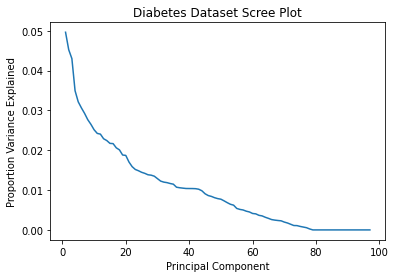

In [179]:
plt.figure()
explained_var = pipe_pca1.stages[-1].explainedVariance
plt.plot(np.arange(1, len(explained_var)+1), explained_var)
plt.title("Diabetes Dataset Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion Variance Explained")

Text(0, 0.5, 'Cumulative Sum of Variance Explained')

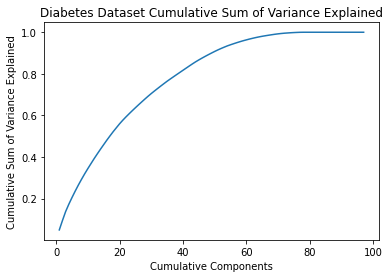

In [180]:
cum_sum = np.cumsum(explained_var)
plt.figure()
plt.plot(np.arange(1, len(explained_var)+1), cum_sum)
plt.title("Diabetes Dataset Cumulative Sum of Variance Explained")
plt.xlabel("Cumulative Components")
plt.ylabel("Cumulative Sum of Variance Explained")

##### Grading Feedback Cell

Your 2 explanations here

- I was able to create 10 principal components for this dataset (k=10).
- I would only use 2 or 3 principal components to build a supervised machine learning model because PC1 is the primary principal component that explains the maximum variance in the data. PC2 is another principal component that is orthogonal to PC1.

##### Grading Feedback Cell

# Question 6: (20 pts)
- Create a pipeline named pipe_pca2 that computes PCA scores for the first 2 principal components.  Add a kmeans object to pipe_pca2 and compute kmeans with k = 5.  
- Create a scatter plot which displays PC2 scores (y-axis) vs. PC1 scores (x-axis) where each point is colored by the cluster assignment.  Include a plot legend.  
- Look for interesting patterns in the clusters and label the points to learn something surprising or interesting about the data set.  One example of what I am looking for is in the case study notebook which has a plot that shows IST-718 is very close to IST-719 - and IST-718 / IST-718 is far away from other courses. You are free to explore as you see fit.  Essentially we are looking for you to find an interesting pattern within the clusters and label the points such that you learn something about the data set.  
- Describe what surprising or interesting fact you learned.  Your plot should be easy to read and labels should not be so dense that they are hard to read / on top of each other.
- The recommender notebook uses a normalizer object to produce the IST-718 / IST-718 plot mentioned above.  The normalizer has the effect of scaling each data observation into a unit vector.  This may or may not be useful to improve your visualization - you will have to try it and see if it helps.  ONLY use the normalizer for visualizations in this assignment.  We do not expect the normalizer to be included in any pipeline except if it is being used for visualization purposes.

In [181]:
# your code here
pipe_pca2 = Pipeline(stages=[feature.Normalizer(inputCol='features', outputCol='norm_tfidf'), 
                                   feature.StandardScaler(withMean=True, withStd=False, 
                                                          inputCol='norm_tfidf',
                                                          outputCol='centered_tfidf'),
                                    clustering.KMeans(k=5, featuresCol='centered_tfidf', predictionCol='kmeans_score'),\
                                   feature.PCA(k=5, inputCol='centered_tfidf', outputCol='new_scores')])\
    .fit(ds_features_df)

In [182]:
q6_df = pipe_pca2.transform(ds_features_df)
q6_df_pd = q6_df.toPandas()

In [183]:
college_names = np.array(ds_features_df.select('id').rdd.map(lambda x: x['id']).collect())
X = np.array(q6_df.select('new_scores').rdd.map(lambda x: x['new_scores']).collect())
print("X.shape:", X.shape)

X.shape: (222, 5)


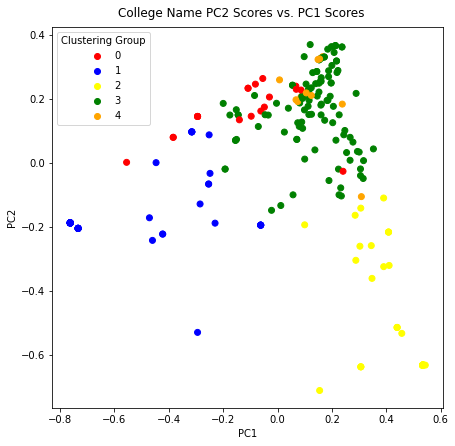

None

In [184]:
from matplotlib.colors import ListedColormap
# Plot PCA2 scores against PCA1 scores

label = [0,1,2,3,4]
color = []
for i in q6_df_pd['kmeans_score']:
  if i == 0:
    color.append(0)
  elif i ==1:
    color.append(1)
  elif i ==2:
    color.append(2)
  elif i ==3:
    color.append(3)
  elif i ==4:
    color.append(4)
cmp = ListedColormap(['red','blue','yellow','green','orange'])

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
scatter = ax.scatter(X[:,0], X[:,1], c = color, cmap = cmp)
fig.suptitle("College Name PC2 Scores vs. PC1 Scores", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

ax.legend(handles = scatter.legend_elements()[0], title = 'Clustering Group', labels = label, loc = 'upper left')
display(plt.show())

In [185]:
# zoom in to get a better look
college_names = np.array(ds_features_df.select('name').rdd.map(lambda x: x['name']).collect())
X1 = np.array(pipe_pca2.transform(ds_features_df).select('new_scores').rdd.map(lambda x: x['new_scores']).collect())
print("X.shape:", X.shape)

X.shape: (222, 5)


In [186]:
new_idx = np.logical_and((X1[:, 0] > -0.4), (X1[:, 0] < -0.1))
X1 = X1[new_idx]
college_names = college_names[new_idx]

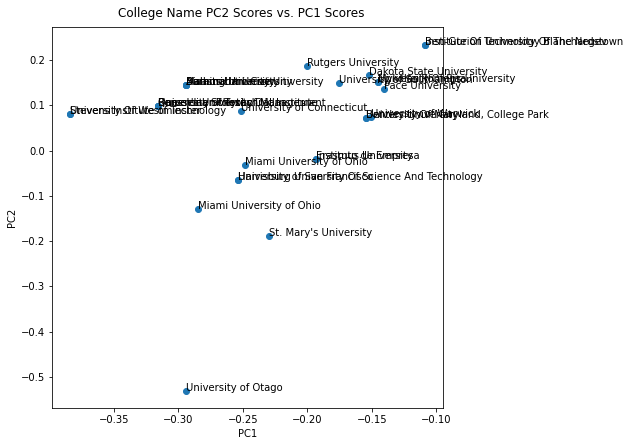

None

In [187]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(7)
scatter = ax.scatter(X1[:,0], X1[:,1])
fig.suptitle("College Name PC2 Scores vs. PC1 Scores", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

for i, txt in enumerate(college_names):
    ax.annotate(txt, (X1[i,0], X1[i,1]))

display(plt.show())

##### Grading Feedback Cell

Your explanation here

From the second scattler plot, we can see that the 'University of Otago' is far away from other universities. There're a large group of universities are very close to each other towards the top right corner which menas they have quite similiar programs to each other. And there are also some dots that cover each other which makes me believe that the programs in those universities are exactly the same.

##### Grading Feedback Cell

# Question 7: (10 pts)
- Starting with pipe_pca1 from question 5, transform the pipeline and save the resulting dataframe to a variable named `pca_fun`.  
-Extract the output from the standard scaler output column from the first row of pca_fun and store in a variable named `row1_centered`. 
- Manually compute 5 PCA scores by projecting `row1_centered` onto the first 5 loading vectors which were computed in your PCA object. Save the 5 projected pca scores in a varialbe called `proj_scores`.  
- Extract the first 5 PCA scores from the first row of the pca_fun scores column and save them in a variable named `pca_fun_scores`.  
- The grading cell prints `proj_scores` and `pca_fun_scores` such that they are right next to each other.  Compare `proj_scores` to `pca_fun_scores` and explain why they are the same or different. 
- Indicate what specific ISLR equation you implemented in the explanation.  Identify the equation by it's equation number in the text book.
- Separate the requested 2 explanations by introducing bullets in the markdown cell.

In [188]:
# your code here (6 pts)
pca_fun = pipe_pca1.transform(ds_features_df)
pca_fun.show(5)

+---+--------------------+--------------------+--------------------+-------+-------+-----+------+--------+--------------------+--------------------+--------------------+----------------+------------+-------+----------+------------+-----+----+-------------+----------------+--------+---------+--------------------+--------+---------+---------+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| id|                name|                 url|             program| degree|country|state|online|oncampus|          department|          created_at|          updated_at|university_count|program_size|courses|admit_reqs|year_founded|notes|cost|visualization|machine learning|business|databases|programminglanguages|capstone|mapreduce|part-time|ethics|                text|               words|            filtered|                  tf|            features|           zfeatures|              scores|
+---+-

In [189]:
row1_centered = pca_fun.select('zfeatures','scores').first()

In [190]:
loadings = pipe_pca1.stages[-1].pc.toArray()
proj_scores = row1_centered['zfeatures'].dot(loadings[:,0:5])

In [191]:
pca_fun_scores = pca_fun.select('scores').first()['scores'][:5]

In [192]:
# Grading Cell - do not modify
print(proj_scores)
print(pca_fun_scores)

[ 0.44505143 -0.02102953  0.36169679  1.12095857  0.08108764]
[ 0.44505143 -0.02102953  0.36169679  1.12095857  0.08108764]


##### Grading Feedback Cell

Your 2 explanations here (4 pts): 

- proj_scores and pca_fun_scores are the same to each other.
- In ISLR equation 10.1 & 10.2: Z1=ϕ11X1+ϕ21X2+…+ϕp1Xp

##### Grading Feedback Cell

# Question 8: (10 pts)
- Perform an inverse transform on the `proj_scores` variable and store the result in a variable named `inverse`.  
- The grading cell below prints `inverse` and the original `row1_centered` data such that they are right next to each other.  
- Explain why `inverse` is the same or different than `row1_centered`.  
- If the `inverse` is different than `row1_centered`, explain how you could modify the forward and reverse transformation process such that the resulting `inverse` data almost exactly matches `row1_centered`.  Be very specific about how you would modify the process.
- Indicate what specific ISLR inverse equation you implemented in the explanation.  Identify the equation by it's equation number in the text book.
- Separate the requested 3 explanations by introducing bullets in the markdown cell.

In [193]:
# print("all loadings shape:", loadings.shape)
# print("all scores shape:", proj_scores.shape)
# print()

# num_loadings = 5
# for i in np.arange(1, num_loadings+1):
#     print("num_loadings:", i)
#     print("loadings shape:", loadings[:,:i].shape)
#     print("scores shape:", proj_scores[:i].shape)

#     print("Method 2:")
#     print("pca_fun_scores.shape", proj_scores[:i].reshape((1,i)).shape)
#     print("loadings[:,:i].T.shape", loadings[:,:i].T.shape)
#     inverse_xform = np.dot(proj_scores[:i].reshape((1,i)), loadings[:,:i].T)
    
#     print("inverse xform shape:", inverse_xform.shape)
#     print("inverse_xform:", inverse_xform)
#     print()

In [194]:
# your code here (4 pts)
inverse = np.dot(proj_scores.reshape((1,5)), loadings[:,:5].T)

In [195]:
# Grading Feedback Cell Do Not Modify
print(row1_centered)
print(inverse)

Row(zfeatures=DenseVector([0.5379, 0.795, -0.6728, -0.8792, 1.0484, -0.3322, 2.4911, -0.2899, -0.3225, -0.3052, -0.2964, -0.266, -0.2706, -0.2266, -0.2589, -0.2488, -0.2278, -0.2278, -0.1816, -0.197, -0.2167, -0.1819, -0.2167, -0.18, -0.18, -0.18, -0.1663, -0.1435, -0.1515, 6.573, -0.1515, -0.1352, -0.1352, -0.1352, -0.1168, -0.1168, -0.1168, -0.1168, -0.0951, -0.0951, -0.0951, -0.0951, -0.0951, -0.0951, -0.0951, -0.0951, -0.0951, -0.0951, -0.0951, -0.0951, -0.0951, -0.0951, -0.0671, -0.0951, -0.0951, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671, -0.0671]), scores=DenseVector([0.4451, -0.021, 0.3617, 1.121, 0.0811, 1.1254, -1.1013, 0.2206, -0.8572, 0.9615, 0.1508, 0.34

##### Grading Feedback Cell

Your 3 explanations here (6 pts):

- the inverse is different than row1_centered
- The reason for me to get approach why two results are different is we didn't run enough loading vectors in this question because the resulting transformed data gets closer to the original data held in 'z' above as the number of loading vectors increases. So if we run towards 97, it will become the same.
- we use equation 10.5 in ISLR book to implemented in the explanation

##### Grading Feedback Cell